# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

The variables species, island, and sex should be dummified.

In [ ]:
!pip install sklearn
!pip install palmerpenguins

In [2]:
import pandas as pd
from palmerpenguins import load_penguins
penguins=load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [30]:
# Code Here
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lr=LinearRegression()
linear_model=LinearRegression()
linear_model3=LinearRegression()
linear_model10=LinearRegression()

In [20]:
penguins.dropna(subset=['bill_length_mm', 'bill_depth_mm'], inplace=True)
X=penguins[['bill_length_mm']]
y=penguins['bill_depth_mm']
lr_fit=linear_model.fit(X, y)

In [17]:
quad=PolynomialFeatures(degree=2)
X_2=quad.fit_transform(X)
quad_fit=lr.fit(X_2,y)

In [25]:
cube=PolynomialFeatures(degree=3)
X_3=cube.fit_transform(X)
cube_fit=linear_model3.fit(X_3,y)

In [31]:
deca=PolynomialFeatures(degree=10)
X_10=deca.fit_transform(X)
deca_fit=linear_model10.fit(X_10,y)

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [32]:
from plotnine import ggplot, geom_point, aes, geom_line
penguins['predicted_linear']=lr_fit.predict(X)
penguins['predicted_quadratic']=quad_fit.predict(X_2)
penguins['predicted_cubic']=cube_fit.predict(X_3)
penguins['predicted_deca']=deca_fit.predict(X_10)

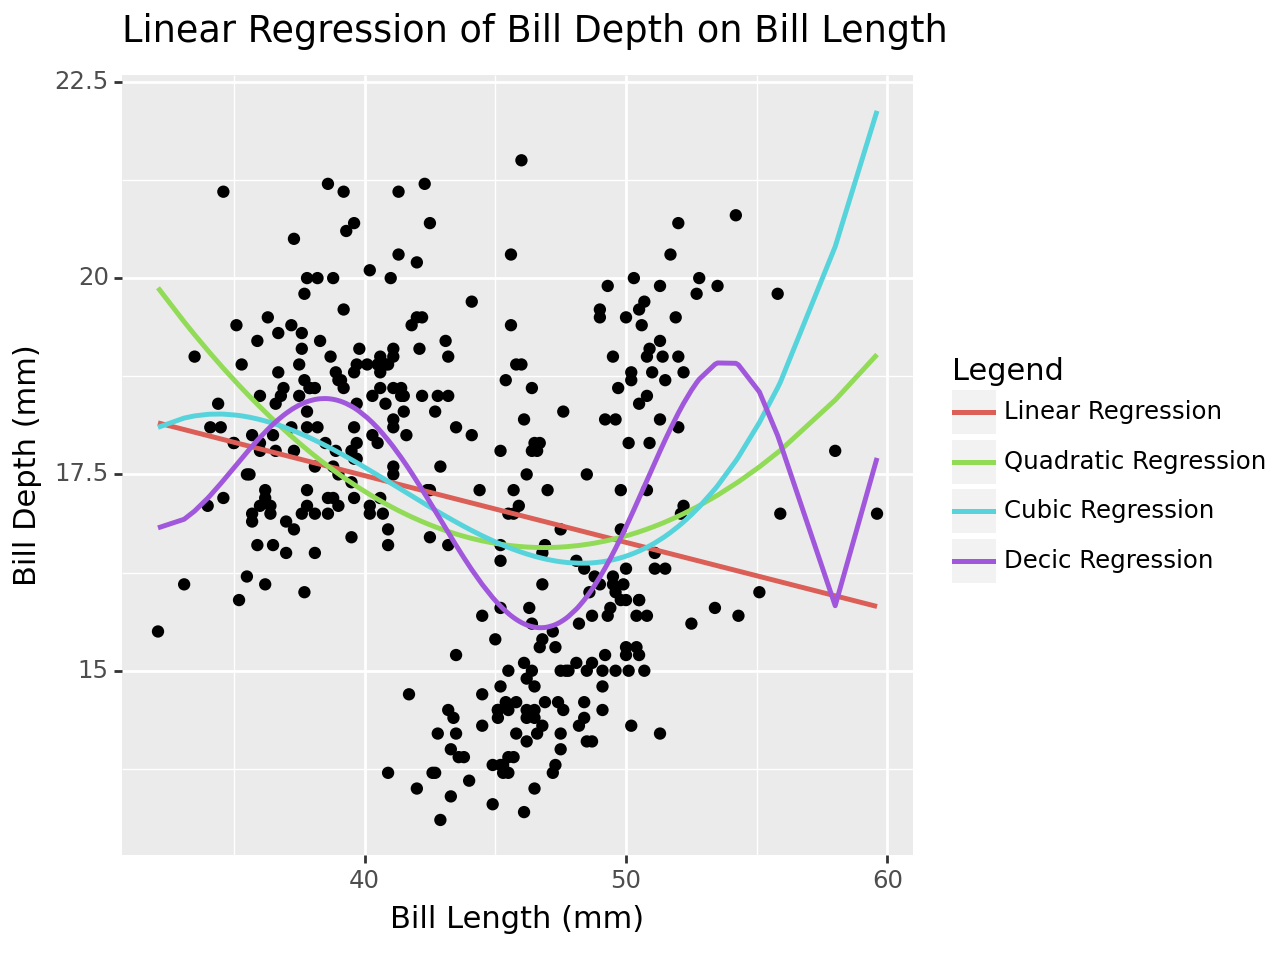

<Figure Size: (640 x 480)>

In [40]:
from plotnine.labels import labs
# Code Here
ggplot(penguins, aes(x="bill_length_mm",y="bill_depth_mm"))+geom_point()+geom_line(aes(x='bill_length_mm', y='predicted_linear',\
                                                                                   color='"Linear Regression"'), size=1)\
                                                                        +geom_line(aes(x='bill_length_mm', y='predicted_quadratic',\
                                                                                   color='"Quadratic Regression"'), size=1)\
                                                                        +geom_line(aes(x='bill_length_mm', y='predicted_cubic',\
                                                                                   color='"Cubic Regression"'), size=1)\
                                                                        +geom_line(aes(x='bill_length_mm', y='predicted_deca',\
                                                                                   color='"Decic Regression"'), size=1)\
                                                                        +labs(title="Linear Regression of Bill Depth on Bill Length",\
                                                                              x="Bill Length (mm)", y="Bill Depth (mm)",color="Legend")

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The linear and quadratic models are probably underfitted because they don't really capture all of the intricacies of the data. The 10th degree model is probably overfitted because it follows the data too closely.
The cubic model fits the data best because it seems to follow the data the best.